# Problem Set 7

See instructions posted on Canvas under [Problem Sets](https://canvas.wisc.edu/courses/288496/files/folder/problem_sets).

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm

In [2]:
%matplotlib notebook

Some physical constants and unit conversions

In [3]:
G = 6.67408e-11 # m^3 kg^-1 s^-2
M_SOLAR = 1.98847e30 # kg
AU = 1.496e11 # m
M_EARTH = 3.0e-6 * M_SOLAR # kg
YEAR = 3.154e7 # s

## 1. Center of Mass Location and Reduced Mass

#### Center of Mass:
Let $m_0$ denote the mass of the more massive body and $m_2$ denote the mass of the other body.

The postion of CoM of the two-body system, $\vec{R}$, is given by:

$$
\begin{aligned}
    \vec{R}
    &=\frac{m_0\vec{r}_0+m_2\vec{r}_2}{m_0+m_2} \\\\
\end{aligned}
$$

Then, according to the problem description,

$$
\begin{aligned}
    \vec{r} &= \vec{r}_2-\vec{r}_0\\\\
    \vec{r}_1 
    &= \vec{R}-\vec{r}_0 \\\\
    &= \frac{m_0\vec{r}_0+m_2\vec{r}_2}{m_0+m_2} - \frac{m_0\vec{r}_0+m_2\vec{r}_0}{m_0+m_2}\\\\
    &= \frac{m_2}{m_0+m_2}(\vec{r}_2-\vec{r}_0)\\\\
    &= \frac{m_2}{m_0+m_2}\vec{r}
\end{aligned}
$$

Thus, 

$$
\begin{aligned}
    \frac{r_1}{r} &= \frac{m_2}{m_1+m_2}
\end{aligned}
$$


In [4]:
# for a two-body central force system, compute the ratio of 
# the seperation between m_1 and CoM of the system
# and the seperation between m_1 and m_2
def CoM_2(m_1, m_2):
    return (m_2)/(m_1+m_2)

#### Reduced Mass:

$$
\mu = \frac{m_1m_2}{m_1+m_2}
$$

In [5]:
# compute the reduced mass for two-body central force systems
def mu_2(m_1, m_2):
    return (m_1*m_2)/(m_1+m_2)

### a) Earth-Sun System

In [6]:
print('r_1/r : ', CoM_2(M_SOLAR, M_EARTH))
print('µ : ', mu_2(M_SOLAR, M_EARTH))

r_1/r :  2.999991000027e-06
µ :  5.965392103823689e+24


Location of CoM:
$$
\frac{r_1}{r} \approx 2.999991000027\times10^{-6}
$$

Reduced Mass:
$$
\mu = 5.965392103823689\times10^{24}kg \approx 3\times10^{-6}M_\odot
$$


### b) Alpha Centauri AB binary star system

In [25]:
print('r_1/r : ', CoM_2(1.09*M_SOLAR, 0.9*M_SOLAR))
print('µ : ', mu_2(1.09*M_SOLAR, 0.9*M_SOLAR))

r_1/r :  0.45226130653266333
µ :  9.802457638190954e+29


Location of CoM:
$$
\frac{r_1}{r} \approx 0.452
$$

Reduced Mass:
$$
\mu = 9.802457638190954\times10^{29}kg\approx 0.493M_\odot
$$

### c) Exoplanet detection

The Earth and the Sun can be seen as both orbiting around a common CoM with the period of one year.
The angular velocity is given by:

$$\omega = \frac{2\pi}{\tau}$$

where $\tau = 1year = 3.154\times10^7s$. 

The seperation distance between the Sun and the CoM is given by:

$$
r_1 = \frac{r_1}{r}\cdot 1AU
$$

Thus, the orbiting speed of the Sun around the CoM induced by the Earth is given by:

$$
v = \omega r_1 = \frac{2\pi}{\tau}\cdot\frac{r_1}{r}\cdot 1AU
$$


In [8]:
v_sun = ((2*np.pi)/YEAR) * CoM_2(M_SOLAR, M_EARTH) * AU

print('Orbiting speed of the Sun: ', v_sun, 'm/s')

Orbiting speed of the Sun:  0.08940662987339504 m/s


The maximum velocity shift that could be observed for the Sun’s motion due to the gravitational attraction of the Earth is:

$$
v = 0.08940662987339504\space m/s \approx 9\space cm/s
$$

## Effective Potential of Pluto's Orbit

The effective potential $U_{eff}$ as a function of seperation between the two bodies $r$:

$$
U_{eff} = \frac{\gamma}{r} + \frac{l^2}{2\mu r^2} \tag{1}
$$

we have that:

$$
\begin{aligned}
    \gamma &= Gm_1m_2\\\\
    l^2 &= \gamma \mu c\\\\
    c &= a(1-\epsilon^2)
\end{aligned}
$$

where $a$ is the semimajor axis of the orbit, and $\epsilon$ is the eccentricity.
Substitute the relations into $(1)$ we have:

$$
U_{eff} = \frac{\gamma}{r} + \frac{\gamma a(1-\epsilon^2)}{2 r^2} \tag{1}
$$

In [9]:
semimajor = 39.529 * AU
eccentricity = 0.2484
M_PLUTO = 0.002 * M_EARTH
gamma = G * M_SOLAR * M_PLUTO
E_total = - (gamma/(2*semimajor))

gamma:  1.5833639213161126e+42
semimajor:  5913538400000.001
E:  -1.3387618496872468e+29
r_min:  4444615461440.001
r_max:  7382461338560.001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in add
  import sys


<IPython.core.display.Javascript object>


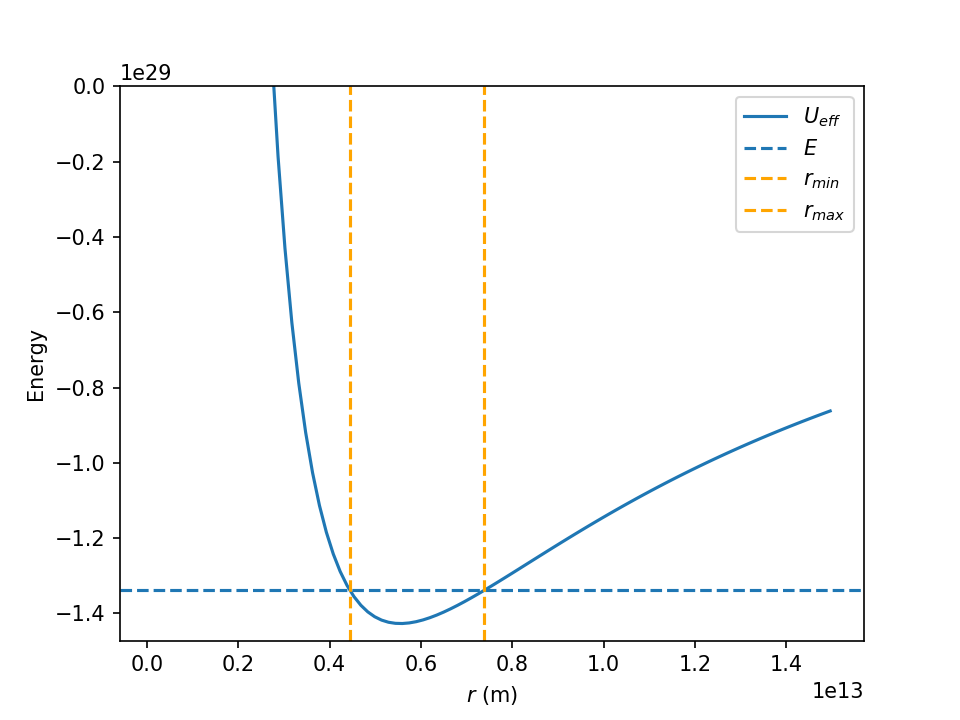

In [10]:
r = np.linspace(0, 100, 100) * AU

print("gamma: ", gamma)
print("semimajor: ", semimajor)
print("E: ", E_total)

u_eff = -gamma/r + (gamma*semimajor*(1-eccentricity**2))/(2*r**2)

r_min = semimajor * (1 - eccentricity)
r_max = semimajor * (1 + eccentricity)

print('r_min: ', r_min)
print('r_max: ', r_max)

plt.figure()
plt.ylim(1.1*E_total, 0)
plt.xlabel(r'$r$ (m)')
plt.ylabel('Energy')
plt.plot(r, u_eff, label=r'$U_{eff}$')
plt.axhline(E_total, linestyle='--', label=r'$E$')
plt.axvline(x = r_min, linestyle='--', color='orange', label=r'$r_{min}$')
plt.axvline(x = r_max, linestyle='--', color='orange', label=r'$r_{max}$')
plt.legend()

There are two turning points $r=r_{min}$ and $r=r_{max}$ where the $E=U_{eff}$ and $\dot{r} = 0$

## Lagrange Points

The idea is to work in the rotating coordinate system where the Sun and Earth have fixed positions. Note that to reduce notational clutter, all the primes have been dropped.

First define a helper function to compute the potential due to the Earth and Sun.

In [11]:
def gravitationalPotential(x_array, y_array, x_0, y_0, G=1., m_0=1., m=1.):
    """Compute gravitational potential scalar field and force vector field.
    
    Parameters
    ----------
    x_array : `list` [`float`]
        Array of x-coordinate positions to evaluate fields.
    y_array : `list` [`float`]
        Array of y-coordinate positions to evaluate fields.
    x_0 : `float`
        x-coordinate of the mass producing fields.
    y_0 : `float`
        y-coordinate of the mass producting fields.
    G : `float`
        Gravitational constant.
    m_0 : `float`
        Mass of test mass.
    m : `float`
        Mass of massive object.
    
    Returns
    -------
    xx : `numpy.ndarray` [`numpy.float64`]
        2D array of x-coordinates.
    yy : `numpy.ndarray` [`numpy.float64`]
        2D array of y-coordinates.
    uu : `numpy.ndarray` [`numpy.float64`]
        2D array of potential scalar field values.
    f_xx : `numpy.ndarray` [`numpy.float64`]
        2D array of force vector field x-component values.
    f_yy : `numpy.ndarray` [`numpy.float64`]
        2D array of force vector field y-component values.
    """
    
    xx, yy = np.meshgrid(x, y)
    
    rr_xx = xx - x_0
    rr_yy = yy - y_0
    rr = np.sqrt(rr_xx**2 + rr_yy**2)
    
    uu = - G * m_0 * m / rr
    f_xx = - G * m_0 * m * rr_xx / rr**3
    f_yy = - G * m_0 * m * rr_yy / rr**3
    
    return xx, yy, uu, f_xx, f_yy

Function to help identify where the gradient of the effective potential is zero.

In [12]:
def stationaryPoints(xx, yy, uu):
    index = np.nonzero(np.gradient(np.sign(np.gradient(uu, axis=0)), axis=0) 
                       * np.gradient(np.sign(np.gradient(uu, axis=1)), axis=1))
    return xx[index], yy[index], uu[index]

In [13]:
# add two potential fields up, performing vector addition
def addPotential(pf_1, pf_2):
    
    # only add the x, y components of force vector
    result = list(map(lambda x, y: x + y, pf_1, pf_2))
    
    # not adding the x, y postions of two masses
    result[0] = pf_1[0]
    result[1] = pf_1[1]
    
    return result

In [14]:
def effPotential(pf_1, pf_2):
    xx = pf_1[0]
    yy = pf_1[1]
    r_square = np.square(xx) + np.square(yy)
    u_eff = -0.5*r_square*(2*np.pi/YEAR)*(2*np.pi/YEAR) + (pf_1[2]+pf_2[2])
    #u_eff = pf_1[2] + pf_2[2]
    return u_eff

[1.48074229e+11 1.48148657e+11 1.49562786e+11 1.49637214e+11
 1.51051343e+11 1.51125771e+11 1.48074229e+11 1.48148657e+11
 1.49562786e+11 1.49637214e+11 1.51051343e+11 1.51125771e+11]
[-37213930.34825771 -37213930.34825771 -37213930.34825771
 -37213930.34825771 -37213930.34825771 -37213930.34825771
  37213930.34825978  37213930.34825978  37213930.34825978
  37213930.34825978  37213930.34825978  37213930.34825978]


<IPython.core.display.Javascript object>


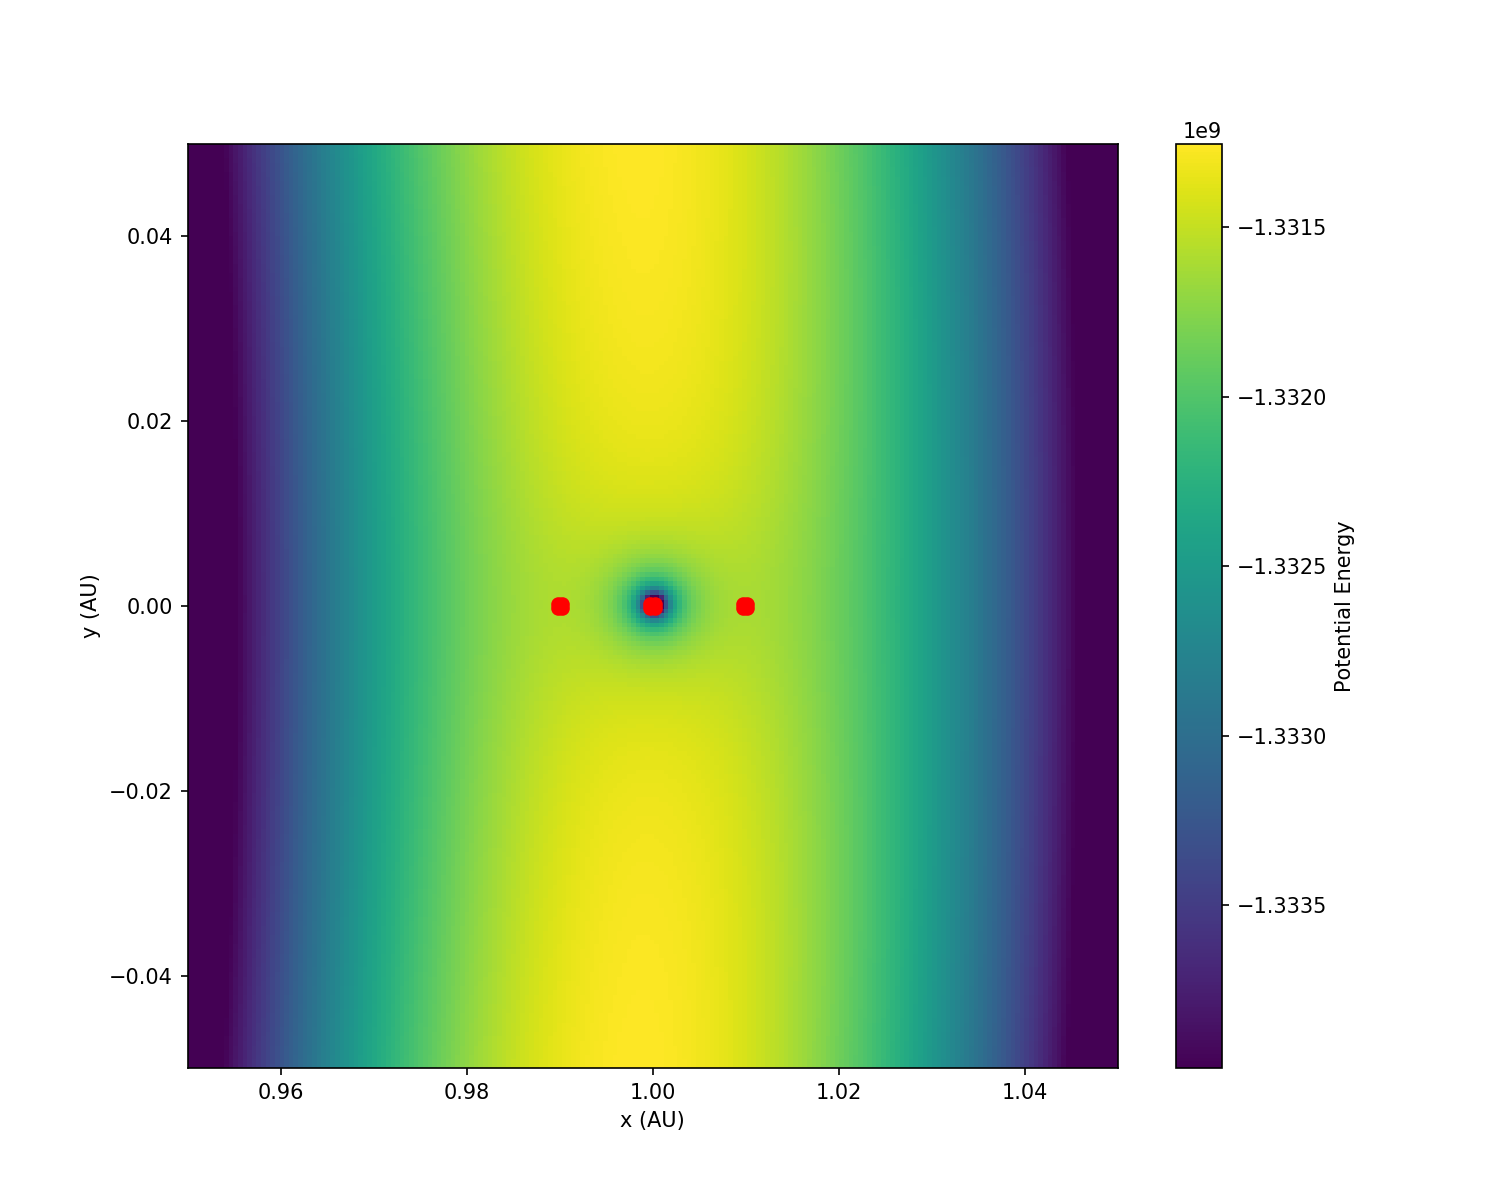

Text(0, 0.5, 'y (AU)')

In [19]:
n = 202
# View of the whole system
#x = np.linspace(-1.1, 1.1, n) * AU
#y = np.linspace(-1.1, 1.1, n) * AU
# Zooming in on region around the Earth
x = np.linspace(1. - 0.05, 1. + 0.05, n) * AU
y = np.linspace(0. - 0.05, 0. + 0.05, n) * AU

xx, yy = np.meshgrid(x, y)
x_1_sun, y_1_sun = 0., 0.
x_1_earth, y_1_earth = 1. * AU, 0.

# In the lines below, uu is a 2D array that represents the effective potential.
# Feel free to use the provided gravitationalPotential function to help
# with the calculation.

pf_earth = gravitationalPotential(xx, yy, x_1_earth, y_1_earth, G=G, m = M_EARTH)
pf_sun = gravitationalPotential(xx, yy, x_1_sun, y_1_sun, G=G, m = M_SOLAR)
uu = effPotential(pf_earth, pf_sun)

x_stationary, y_stationary, uu_stationary = stationaryPoints(xx, yy, uu)
print(x_stationary)
print(y_stationary)

plt.figure(figsize=(10, 8))
plt.pcolor(xx / AU, yy / AU, uu, norm=SymLogNorm(1., vmin=uu.min(), vmax=uu.max()))
plt.pcolor(xx / AU, yy / AU, uu, vmin=np.quantile(uu, 0.1))
plt.colorbar(label='Potential Energy')
plt.scatter(x_stationary / AU, y_stationary / AU, c='red')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')

It may be helpful to create an alternative visualization using contours to represent equipotential lines.

<IPython.core.display.Javascript object>


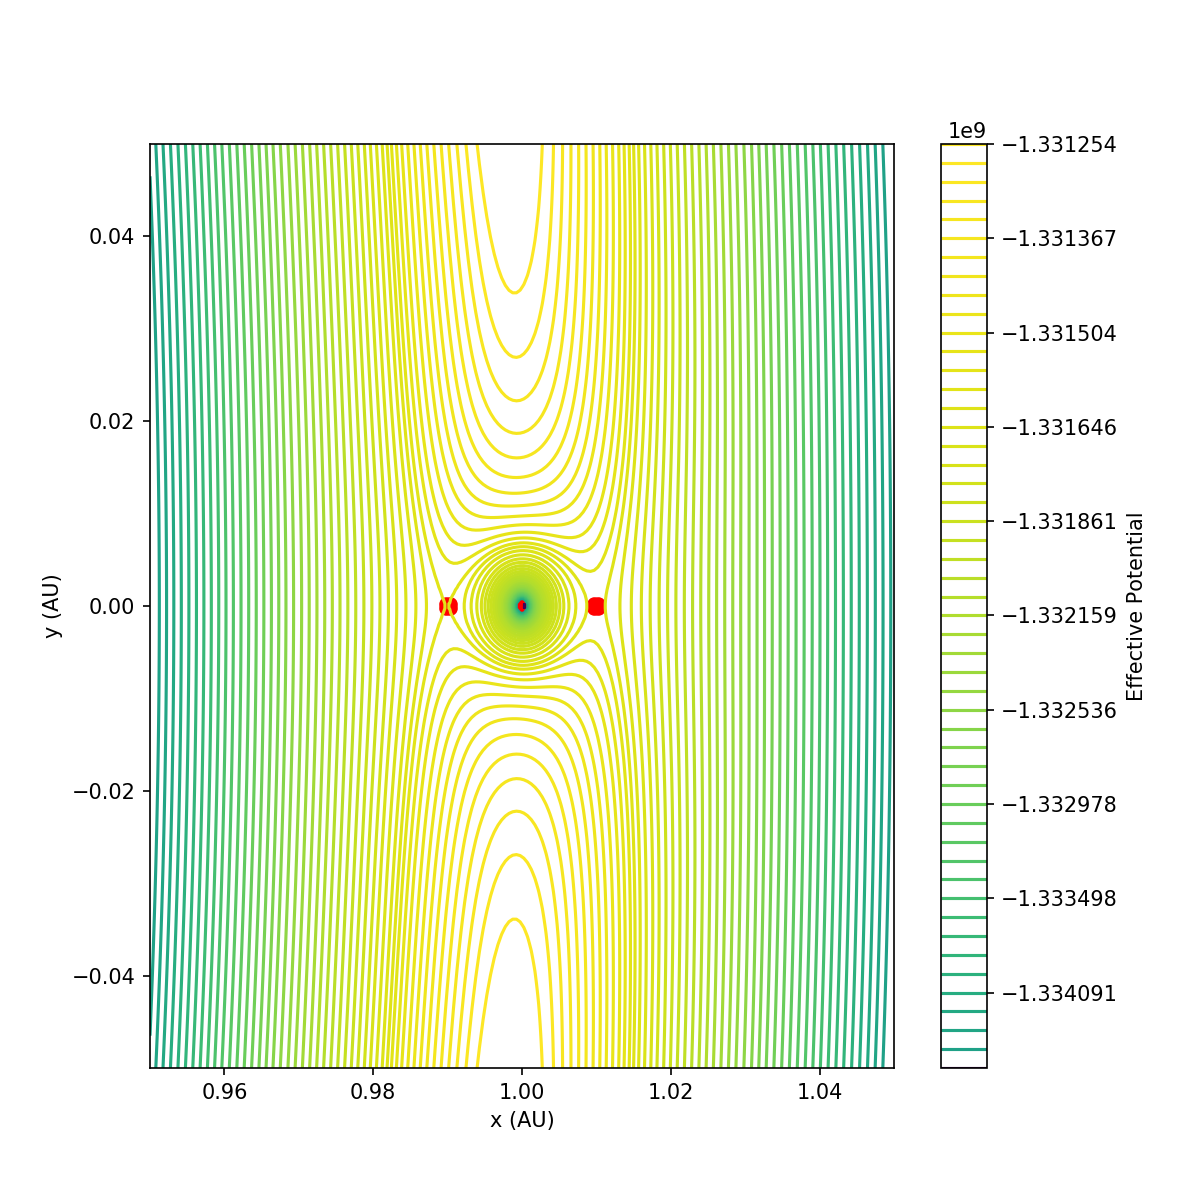

/usr/lib/python3/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0, 0.5, 'y (AU)')

In [16]:
levels = np.quantile(uu, np.linspace(0., 1., 50))
plt.figure(figsize=(8, 8))
plt.contour(xx / AU, yy / AU, uu, levels=levels, lw=4)
plt.colorbar(label='Effective Potential')
plt.scatter(x_stationary / AU, y_stationary / AU, c='red')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')

In [24]:
# Estimate Distance
L2_to_Earth = x_stationary[5] - x_stationary[8]
print(L2_to_Earth)

1562985074.6268616


Distance from Earth to James Webb Telescope is about $1562985074\space m$, 1.5 million km

## Trip to Mars

### a) Earth Orbit to Transfer Orbit

At the location of departure, we approximate the speed of the spacecraft equals the speed of the Earth. Let $\lambda$ denote the ratio of the spacecraft's speed just after ($v_T$) and just before ($v_1$) the thrust, we have:

$$
v_T = \lambda v_1
$$

For the elliptical transfer orbit, we have the following quantities:

Angular momentum of the spacecraft about the Sun:

$$
\begin{aligned}
    l_T &= r_1mv_T = r_1m(\lambda v_1)\\\\
    l_T &= \lambda l_1\\
\end{aligned}
$$

and, since the Earth's orbit is circular, 

$$
\begin{aligned}
c_T &= \frac{l_T^2}{\gamma\mu}= \frac{\lambda^2l_1^2}{\gamma\mu}= \lambda^2 c_1=\lambda^2 r_1\\\\
c_T &= \lambda^2 r_1
\end{aligned}
$$

The pericenter and the apocenter:

$$
\begin{aligned}
r_{min} &= r_1 = \frac{c_T}{1+\epsilon_T} =\frac{\lambda^2 r_1}{1+\epsilon_T}\\
r_{max} &= r_2 = \frac{c_T}{1-\epsilon_T}\\\\
\epsilon_T &=  \frac{r_2-r_1}{r_2+r_1}\\\\
\lambda^2 &= 1 + \epsilon_T \\\\
\lambda &= \sqrt{1 + \frac{r_2-r_1}{r_2+r_1}}\\\\
v_T &= \lambda v_1 = \sqrt{1 + \frac{r_2-r_1}{r_2+r_1}}v_1
\end{aligned}
$$

Then, 

$$
\Delta v_1 = v_T - v_1 = (\lambda - 1)v_1 = (\sqrt{1 + \frac{r_2-r_1}{r_2+r_1}} - 1)r_1\frac{2\pi}{\tau_1}
$$

In [34]:
r_1 = 1 * AU
r_2 = 1.52*AU
t_1 = 1 * YEAR
t_2 = 1.88 * YEAR
lambd = np.sqrt(1 + (r_2-r_1)/(r_2+r_1))

v_1 = r_1 * (2*np.pi/t_1)
v_t = lambd*v_1

delta_v1 = v_t - v_1

print(delta_v1)

2930.737100846647


$$
\Delta v_1 \approx 2930.737 \space m/s
$$

### b) Transfer Orbit to Mars Orbit
On the elliptical transfer orbit, the angular momentum, $l_T$, is concerved. Thus, we can calculate the arrival speed through the following:

$$
\begin{aligned}
mr_2v_T^\prime &= mr_1v_T \\\\
v_T^\prime &= \frac{r_1}{r_2}v_T
\end{aligned}
$$

Since the Mars orbit is circular, we can calculate $v_2$:

$$
\begin{aligned}
m\frac{v_2^2}{r_2} &= \frac{GM_\odot m}{r_2^2}\\\\
v_2 &= \sqrt{\frac{GM_\odot}{r_2}}
\end{aligned}
$$

Then,

$$
\Delta v_2 = v_2 - v_T^\prime = \sqrt{\frac{GM_\odot}{r_2}} - \frac{r_1}{r_2}v_T
$$

In [33]:
v_2 = np.sqrt(G*M_SOLAR/r_2)
delta_v2 = v_2 - r_1/r_2*v_t

print(delta_v2)

2623.477946735129


$$
\Delta v_2 \approx 2623.478 \space m/s
$$

### c) One-Way Travel Time
According to Kepler's Third Law, the period of the elliptical orbit is given by

$$
T^2 = \frac{4\pi^2 a^3}{G(M_\odot + m)}
$$

Since $M_\odot \gg m$, the one-way travel time along the transfer orbit is

$$
t = \frac{1}{2}T = \frac{1}{2}\sqrt{\frac{4\pi^2 a^3}{GM_\odot}}=\sqrt{\frac{\pi^2 a^3}{GM_\odot}}
$$

where

$$
a = \frac{r_1+r_2}{2}
$$

In [48]:
a = (r_1+r_2) / 2

travel_time = np.sqrt(np.pi**2*a**3/G/M_SOLAR)
days = travel_time / YEAR * 365
print(travel_time)
print(days)

22317618.787623588
258.2730138707232


Travel time:

$$
22317618.787623588\space s \approx 258 \space days
$$